In [ ]:
from google.colab import files
uploaded = files.upload()


Saving placement-data.csv to placement-data.csv


Saving placement-data.csv to placement-data (2).csv
Total Students: 5
Average GPA: 8.48


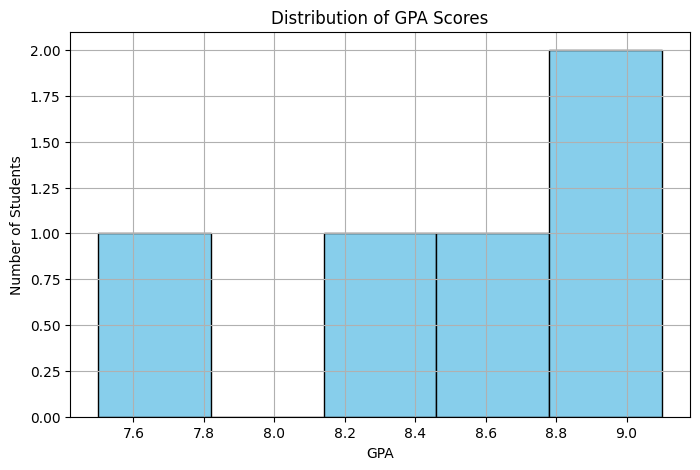

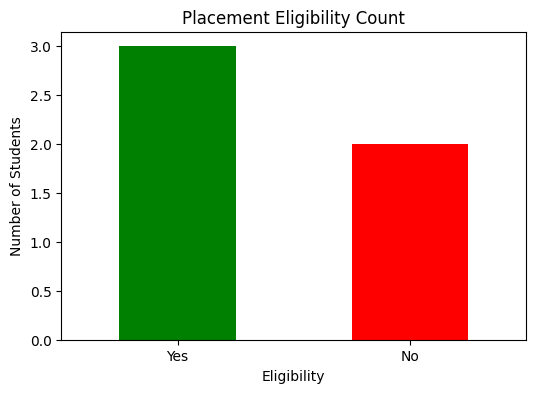

✅ Model Accuracy on Test Set: 100.00%
🔍 Prediction for new student: Yes


In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# Step 2: Upload CSV
uploaded = files.upload()

# Step 3: Load data
df = pd.read_csv("placement-data.csv")

# Step 4: Overview
print("Total Students:", len(df))
print("Average GPA:", df["GPA"].mean())

# Step 5: Data Visualization
# GPA Histogram
plt.figure(figsize=(8,5))
plt.hist(df["GPA"], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribution of GPA Scores")
plt.xlabel("GPA")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

# Eligibility Bar Chart
eligible_counts = df["Eligible"].value_counts()
plt.figure(figsize=(6,4))
eligible_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Placement Eligibility Count")
plt.xlabel("Eligibility")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.show()

# Step 6: Data Preprocessing
X = df[["GPA", "Backlogs"]]
y = df["Eligible"].map({"Yes": 1, "No": 0})

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Step 9: Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy on Test Set: {accuracy*100:.2f}%")

# Step 10: Predict New Data
new_student = pd.DataFrame([[8.6, 0]], columns=["GPA", "Backlogs"])
prediction = model.predict(new_student)
print("🔍 Prediction for new student:", "Yes" if prediction[0] == 1 else "No")


In [5]:
from google.colab import files
uploaded = files.upload()



Saving placement-data.csv to placement-data.csv


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import pickle

# Load dataset
df = pd.read_csv("placement-data.csv")

# Prepare features and labels
X = df[["GPA", "Backlogs"]]
y = df["Eligible"]

# Train model
model = DecisionTreeClassifier()
model.fit(X, y)

# Save model to file
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved as model.pkl")


✅ Model saved as model.pkl


In [8]:
from google.colab import files
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.5 MB/s eta 0:00:00


In [12]:
from google.colab import files
uploaded = files.upload()


Saving model.pkl to model (1).pkl


In [4]:
from google.colab import files
uploaded = files.upload()

Saving model.pkl to model.pkl


In [6]:
!pip freeze > requirements.txt


In [15]:
!pip install pyngrok streamlit


In [16]:
from pyngrok import ngrok

# Paste your actual ngrok auth token here
!ngrok authtoken 2xSEUrKJbkMKsaVUfsWmEEBofzI_6CzZvpmX69wjEJRquqsi4


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [17]:
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://3c2f-35-226-20-4.ngrok-free.app" -> "http://localhost:8501"


In [20]:
!streamlit run app.py &>/dev/null &


In [23]:
df["Eligible"].value_counts()


,count
Eligible,
Yes,3
No,2


In [2]:
%%writefile app.py
import streamlit as st
import pickle

# Load model
model = pickle.load(open("model.pkl", "rb"))

st.title("Placement Predictor")

GPA = st.number_input("Enter GPA")
backlogs = st.number_input("Enter number of backlogs", step=1)

if st.button("Check Eligibility"):
    if GPA > 8.5 and backlogs == 0:
        result = "Eligible"
    else:
        prediction = model.predict([[GPA, backlogs]])
        result = "Eligible" if prediction[0] == 1 else "Not Eligible"
    st.success(f"Prediction: {result}")



Writing app.py


In [27]:
st.write(f"Debug: GPA={GPA}, Backlogs={backlogs}")


2025-05-22 14:35:22.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 14:35:22.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [28]:
backlogs = int(st.number_input("Enter number of backlogs", min_value=0, max_value=10, step=1))


2025-05-22 14:35:37.790 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 14:35:37.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 14:35:37.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 14:35:37.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 14:35:37.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 14:35:37.796 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [29]:
import streamlit as st
import pickle

model = pickle.load(open('model.pkl', 'rb'))

st.title("Placement Predictor")

# Inputs
GPA = st.number_input("Enter your GPA", min_value=0.0, max_value=10.0, step=0.01)
backlogs = int(st.number_input("Enter number of backlogs", min_value=0, max_value=10, step=1))

st.write(f"Debug: GPA={GPA}, Backlogs={backlogs}")

if st.button("Check Eligibility"):
    if GPA > 8.5 and backlogs == 0:
        result = "Eligible"
    else:
        prediction = model.predict([[GPA, backlogs]])
        result = "Eligible" if prediction[0] == 1 else "Not Eligible"

    st.success(f"Prediction: {result}")


2025-05-22 14:36:47.923 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 14:36:47.923 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 14:36:47.924 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 14:36:47.926 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 14:36:47.927 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 14:36:47.929 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 14:36:47.930 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-22 14:36:47.931 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [3]:
!pip install pyngrok streamlit

from pyngrok import ngrok

!ngrok authtoken 2xSEUrKJbkMKsaVUfsWmEEBofzI_6CzZvpmX69wjEJRquqsi4

public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")

!streamlit run app.py &>/dev/null &


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Streamlit app is live at: NgrokTunnel: "https://acae-34-23-11-15.ngrok-free.app" -> "http://localhost:8501"
